In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N) * 6 -3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

In [3]:
print(tf.__version__)

2.10.0


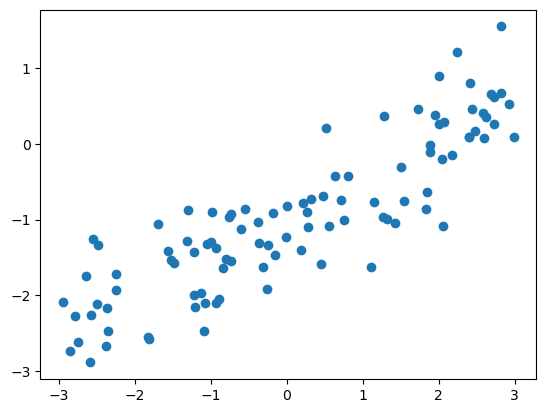

In [4]:
plt.scatter(X, y)

In [2]:
# build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

NameError: name 'Input' is not defined

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss="mse",
    # optimizer="adam",
    optimizer=Adam(learning_rate=0.1),
    metrics=["mae"]
)

In [ ]:
r = model.fit(
    X.reshape(-1, 1), y,
    epochs=200,
    batch_size=32,
)

In [ ]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.legend();

In [ ]:
# Plot mae per iteration
plt.plot(r.history["mae"], label="mae")
plt.legend();

In [ ]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

In [ ]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [ ]:
# Check the learned paramteres
model.layers

In [ ]:
model.layers[1].get_weights()